# Detection of Non-functional Water Points Using Machine Learning Algorithms 

![Image Alt Text](images/Film_image_1.png)
Credit : geralt from pixabay.com

# Overview
Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many wells (water points) already established in the country, but some are in need of repair while others have failed altogether. The Government of Tanzania is looking to find patterns in non-functional wells to influence how new wells are built. 

# Business Problem

Detect patterns in non-functional water points to inform more robust construction methods and materials for new water points.


# Data Understanding


**Target**

- functional : the waterpoint is operational and there are no repairs needed
- functional needs repair : the waterpoint is operational, but needs repairs
- non functional : the waterpoint is not operational

**Features**

- amount_tsh : Total static head (amount water available to waterpoint)
- date_recorded : The date the row was entered
- funder : Who funded the well
- gps_height : Altitude of the well
- installer : Organization that installed the well
- longitude : GPS coordinate
- latitude : GPS coordinate
- wpt_name : Name of the waterpoint if there is one
- num_private :Private use or not
- basin : Geographic water basin
- subvillage : Geographic location
- region : Geographic location
- region_code : Geographic location (coded)
- district_code : Geographic location (coded)
- lga : Geographic location
- ward : Geographic location
- population : Population around the well
- public_meeting : True/False
- recorded_by : Group entering this row of data
- scheme_management : Who operates the waterpoint
- scheme_name : Who operates the waterpoint
- permit : If the waterpoint is permitted
- construction_year : Year the waterpoint was constructed
- extraction_type : The kind of extraction the waterpoint uses
- extraction_type_group : The kind of extraction the waterpoint uses
- extraction_type_class : The kind of extraction the waterpoint uses
- management : How the waterpoint is managed
- management_group : How the waterpoint is managed
- payment : What the water costs
- payment_type : What the water costs
- water_quality : The quality of the water
- quality_group : The quality of the water
- quantity : The quantity of water
- quantity_group : The quantity of water
- source : The source of the water
- source_type : The source of the water
- source_class : The source of the water
- waterpoint_type : The kind of waterpoint
- waterpoint_type_group : The kind of waterpoint

# Data Preparation 

### Import and Read Datasets

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

# Column Transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Base
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
# Load the datasets
features_data = 'data/WellWaterData.csv'
target_data = 'data/TargetData.csv'

features = pd.read_csv(features_data)
target = pd.read_csv(target_data)

# Display the contents of the datasets
features.head(), target.head()


(      id  amount_tsh date_recorded        funder  gps_height     installer  \
 0  69572      6000.0    2011-03-14         Roman        1390         Roman   
 1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
 2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
 3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
 4  19728         0.0    2011-07-13   Action In A           0       Artisan   
 
    longitude   latitude              wpt_name  num_private  ... payment_type  \
 0  34.938093  -9.856322                  none            0  ...     annually   
 1  34.698766  -2.147466              Zahanati            0  ...    never pay   
 2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
 3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
 4  31.130847  -1.825359               Shuleni            0  ...    never pay   
 
   water_quality quality_group      

### Merging Datasets


In [3]:
# Checking for unique IDs in both datasets to ensure they match
unique_ids_features = features['id'].nunique()
unique_ids_target = target['id'].nunique()

unique_ids_features, unique_ids_target


(59400, 59400)

In [4]:
# Merging the datasets on the 'id' column
merged_data = pd.merge(features, target, on='id')

# Displaying the first few rows of the merged dataset
merged_data.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
merged_data.value_counts()

id     amount_tsh  date_recorded  funder                  gps_height  installer         longitude  latitude    wpt_name          num_private  basin                    subvillage  region       region_code  district_code  lga           ward          population  public_meeting  recorded_by              scheme_management  scheme_name                   permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management  management_group  payment                payment_type  water_quality  quality_group  quantity      quantity_group  source       source_type  source_class  waterpoint_type              waterpoint_type_group  status_group  
74247  50.0        2013-02-16     Mission                 965         DWE               35.432998  -10.639270  Kwa Mapunda       0            Ruvuma / Southern Coast  Mpakani     Ruvuma       10           2              Songea Rural  Maposeni      900         True            GeoData Consultants Ltd  VWC                Mradi 

## Clean
Preparing the merged dataset for feature exploration and how they relate to the 'status_group' target variable.

In [7]:
# Converting 'date_recorded' to datetime
merged_data['date_recorded'] = pd.to_datetime(merged_data['date_recorded'])

### Addressing Categorical Features with Parent and Subgroup Columns

In [8]:
grouped = merged_data.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()
print(grouped)

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

In [9]:
grouped = merged_data.groupby(['management_group', 'management']).size()
print(grouped)

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
dtype: int64


In [10]:
grouped = merged_data.groupby(['waterpoint_type_group', 'waterpoint_type']).size()
print(grouped)

waterpoint_type_group  waterpoint_type            
cattle trough          cattle trough                    116
communal standpipe     communal standpipe             28522
                       communal standpipe multiple     6103
dam                    dam                                7
hand pump              hand pump                      17488
improved spring        improved spring                  784
other                  other                           6380
dtype: int64


### Handling Missing Values

In [11]:
# Calculating the percentage of zero values for each column
zero_value_percentages = {}
for column in merged_data.columns:
    zero_count = (merged_data[column] == 0).sum()
    zero_value_percentages[column] = (zero_count / len(merged_data)) * 100


zero_value_percentages

{'id': 0.0016835016835016834,
 'amount_tsh': 70.09932659932659,
 'date_recorded': 0.0,
 'funder': 0.0,
 'gps_height': 34.40740740740741,
 'installer': 0.0,
 'longitude': 3.05050505050505,
 'latitude': 0.0,
 'wpt_name': 0.0,
 'num_private': 98.72558922558923,
 'basin': 0.0,
 'subvillage': 0.0,
 'region': 0.0,
 'region_code': 0.0,
 'district_code': 0.038720538720538725,
 'lga': 0.0,
 'ward': 0.0,
 'population': 35.994949494949495,
 'public_meeting': 8.51010101010101,
 'recorded_by': 0.0,
 'scheme_management': 0.0,
 'scheme_name': 0.0,
 'permit': 29.44781144781145,
 'construction_year': 34.86363636363636,
 'extraction_type': 0.0,
 'extraction_type_group': 0.0,
 'extraction_type_class': 0.0,
 'management': 0.0,
 'management_group': 0.0,
 'payment': 0.0,
 'payment_type': 0.0,
 'water_quality': 0.0,
 'quality_group': 0.0,
 'quantity': 0.0,
 'quantity_group': 0.0,
 'source': 0.0,
 'source_type': 0.0,
 'source_class': 0.0,
 'waterpoint_type': 0.0,
 'waterpoint_type_group': 0.0,
 'status_group'

In [12]:
# Calculating the percentage of missing values in each column
missing_values = merged_data.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values



scheme_name          47.417508
scheme_management     6.526936
installer             6.153199
funder                6.119529
public_meeting        5.612795
permit                5.144781
subvillage            0.624579
dtype: float64

Since 'scheme_management', 'installer', 'funder', and 'permit' have less than 7% missing values and are potentially relevant, replacing them is a good option.

In [13]:
# Replacing the missing values
for column in ['scheme_management', 'installer', 'funder', 'permit']:
    merged_data[column].fillna('Unknown', inplace=True)

# Sanity check on missing values
remaining_missing_values = merged_data.isnull().sum()
remaining_missing_values[remaining_missing_values > 0]

subvillage          371
public_meeting     3334
scheme_name       28166
dtype: int64

### Dropping Columns

In [14]:
# Dropping additional group columns
# Dropping irrelvant columns
# Dropping features with missing values over 45%
features_dropped = merged_data.drop(columns=['quantity_group', 'extraction_type_group', 
                                             'waterpoint_type_group', 'management_group', 
                                             'payment', 'water_quality', 'source', 'source_class',
                                             'region_code', 'public_meeting', 'num_private', 'recorded_by',
                                             'wpt_name', 'district_code', 'id', 'lga', 
                                             'ward', 'subvillage', 'extraction_type', 'scheme_name',])

features_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             59400 non-null  float64       
 1   date_recorded          59400 non-null  datetime64[ns]
 2   funder                 59400 non-null  object        
 3   gps_height             59400 non-null  int64         
 4   installer              59400 non-null  object        
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   basin                  59400 non-null  object        
 8   region                 59400 non-null  object        
 9   population             59400 non-null  int64         
 10  scheme_management      59400 non-null  object        
 11  permit                 59400 non-null  object        
 12  construction_year      59400 non-null  int64         
 13  e

### Removing Duplicates

In [15]:
features_dropped.duplicated().sum()

685

In [16]:
data_dedup = features_dropped.drop_duplicates()

# Rechecking for duplicates
new_duplicate_count = data_dedup.duplicated().sum()
new_duplicate_count

0

### Feature Engineering

In [17]:
# Extracting year and month from 'date_recorded'
data_dedup['year_recorded'] = data_dedup['date_recorded'].dt.year
data_dedup['month_recorded'] = data_dedup['date_recorded'].dt.month

data_dedup[['longitude', 'gps_height', 'construction_year', 'year_recorded', 'month_recorded']].head()


<ipython-input-17-a25e6a562f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup['year_recorded'] = data_dedup['date_recorded'].dt.year
<ipython-input-17-a25e6a562f69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup['month_recorded'] = data_dedup['date_recorded'].dt.month


,longitude,gps_height,construction_year,year_recorded,month_recorded
0,34.938093,1390,1999,2011,3
1,34.698766,1399,2010,2013,3
2,37.460664,686,2009,2013,2
3,38.486161,263,1986,2013,1
4,31.130847,0,0,2011,7


In [18]:
# Adding 'well_age' feature
data_dedup['well_age'] = data_dedup.apply(lambda row: 0 if row['construction_year'] == 0 
                                          else row['year_recorded'] - row['construction_year'], axis=1)

# Displaying the first 50 rows to check the 'construction_year' and 'well_age'
data_dedup[['year_recorded', 'construction_year', 'well_age']].value_counts()


<ipython-input-18-aef931d43ca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup['well_age'] = data_dedup.apply(lambda row: 0 if row['construction_year'] == 0


year_recorded  construction_year  well_age
2011           0                   0          13104
2012           0                   0           5000
2013           0                   0           1906
               2000                13          1506
               2010                3           1407
                                              ...  
2004           2005               -1              1
               2006               -2              1
               2007               -3              1
2012           1984                28             1
2002           0                   0              1
Length: 168, dtype: int64

### Creating Binary Target Column

First, we'll need to understand the distribution of the target variable and visualize the proportion of functional vs. non-functional wells.

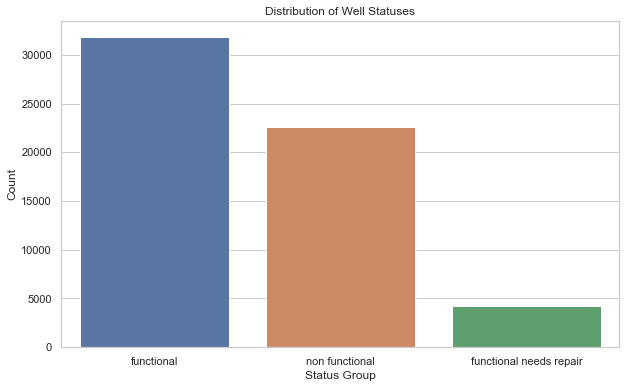

In [19]:
sns.set(style="whitegrid")

# Plotting the distribution of well statuses
plt.figure(figsize=(10, 6))
sns.countplot(x='status_group', data=data_dedup)
plt.title('Distribution of Well Statuses')
plt.ylabel('Count')
plt.xlabel('Status Group')
plt.show()

To address differing opinions on how to condense our target into a binary column, we will create two separte binary target columns and assess the better performer on our baseline model. 

**status_binary:**

- Class 0 = non-functional & functional needs repair
- Class 1 = functional

**status_binary_reversed:**

- Class 0 = non-functional
- Class 1 = functional & functional needs repair


In [20]:
# Binary encoding of the 'status_group' column

# 'functional' is assigned 1 and 'non functional' or 'functional needs repair' are assigned 0
data_dedup['status_binary'] = data_dedup['status_group'].apply(lambda x: 1 if x == 'functional' else 0)

# 'non-functional' is assigned 0 and 'functional' or 'functional needs repair' are assigned 1
data_dedup['status_binary_reversed'] = data_dedup['status_group'].apply(lambda x: 0 if x == 'non functional' else 1)

data_dedup[['status_group', 'status_binary', 'status_binary_reversed']].head(20)


<ipython-input-20-e016e00ec615>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup['status_binary'] = data_dedup['status_group'].apply(lambda x: 1 if x == 'functional' else 0)
<ipython-input-20-e016e00ec615>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dedup['status_binary_reversed'] = data_dedup['status_group'].apply(lambda x: 0 if x == 'non functional' else 1)


,status_group,status_binary,status_binary_reversed
0,functional,1,1
1,functional,1,1
2,functional,1,1
3,non functional,0,0
4,functional,1,1
5,functional,1,1
6,non functional,0,0
7,non functional,0,0
8,non functional,0,0
9,functional,1,1


### Creating Master Dataset

In [21]:
# Creating master dataset with all values of 'well_age' greater than or equal to zero
# to eliminate negative values where 'recorded_year' was likely listed inaccurately
master_data = data_dedup[data_dedup['well_age'] >= 0]
master_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58706 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   amount_tsh              58706 non-null  float64       
 1   date_recorded           58706 non-null  datetime64[ns]
 2   funder                  58706 non-null  object        
 3   gps_height              58706 non-null  int64         
 4   installer               58706 non-null  object        
 5   longitude               58706 non-null  float64       
 6   latitude                58706 non-null  float64       
 7   basin                   58706 non-null  object        
 8   region                  58706 non-null  object        
 9   population              58706 non-null  int64         
 10  scheme_management       58706 non-null  object        
 11  permit                  58706 non-null  object        
 12  construction_year       58706 non-null  int64 

In [22]:
# Saving master dataset to csv
master_data.to_csv('data/master_data.csv', index=False)

### Data Distribution Visualizations

Using histograms, we'll plot the distribution of key numeric variables like amount_tsh, population, and gps_height.

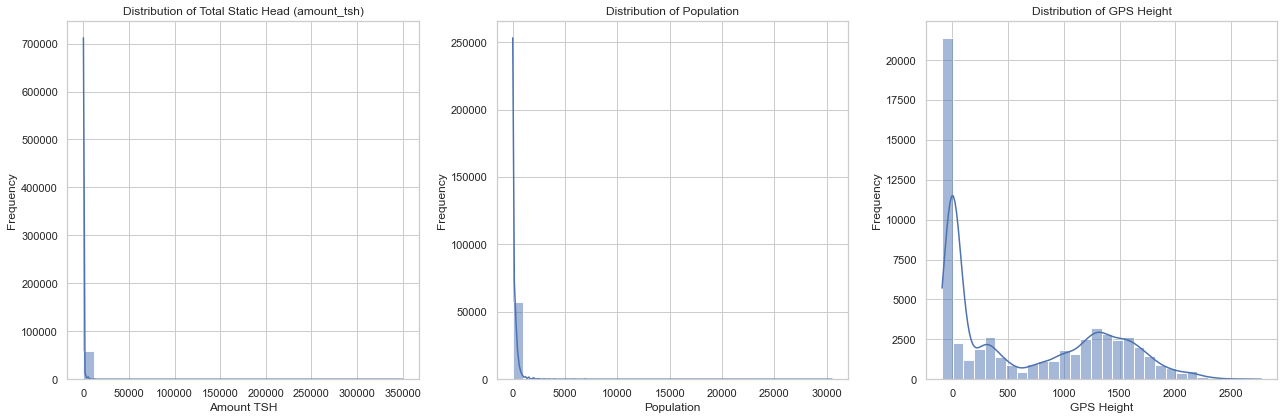

In [23]:
sns.set_style("whitegrid")

# Creating histograms for 'amount_tsh', 'population', and 'gps_height'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'amount_tsh'
sns.histplot(master_data['amount_tsh'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Total Static Head (amount_tsh)')
axes[0].set_xlabel('Amount TSH')
axes[0].set_ylabel('Frequency')

# Plot for 'population'
sns.histplot(master_data['population'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Population')
axes[1].set_xlabel('Population')
axes[1].set_ylabel('Frequency')

# Plot for 'gps_height'
sns.histplot(master_data['gps_height'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of GPS Height')
axes[2].set_xlabel('GPS Height')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Observations
These distributions reflect the high number of zero values in our dataset for these features.

**Total Static Head (amount_tsh):** The distribution appears to be highly skewed to the right, indicating that most wells have a low static head value.

**Population:** This distribution is also right-skewed, showing that most wells serve a relatively small population, with fewer points serving larger populations.

**GPS Height:** The distribution is more varied, indicating a range of elevations at which wells are located.

### Geographical Analysis
We'll create a geographical plot using latitude and longitude to see if there is any geographical pattern in the status of wells.

In [24]:
!pip install geopandas

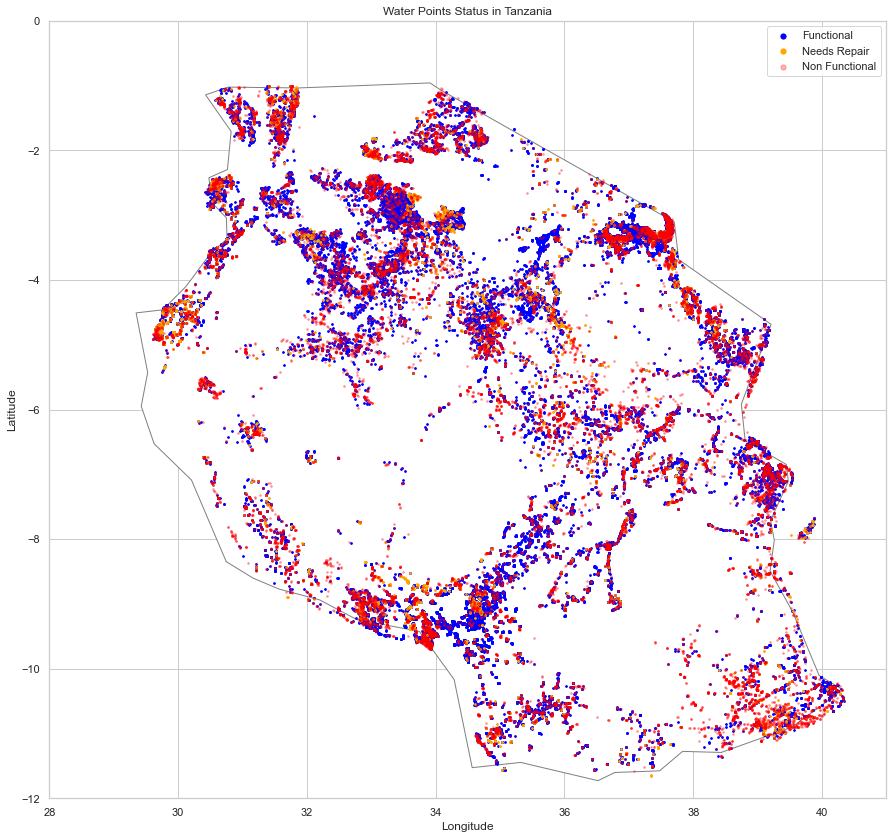

In [25]:
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(
    master_data, geometry=geopandas.points_from_xy(master_data.longitude, master_data.latitude))

functional = gdf[gdf['status_group'] == 'functional']
repair = gdf[gdf['status_group'] == 'functional needs repair']
non_functional = gdf[gdf['status_group'] == 'non functional']

world_shapefile_path = 'data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = geopandas.read_file(world_shapefile_path)

# Filter for Tanzania
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust size of the figure
base = world[world.ADMIN == 'United Republic of Tanzania'].plot(color='white', edgecolor='gray', ax=ax)

# Scatter plots for each category
ax.scatter(functional['longitude'], functional['latitude'], c='blue', alpha=1, s=3, label='Functional')
ax.scatter(repair['longitude'], repair['latitude'], c='orange', alpha=1, s=3, label='Needs Repair')
ax.scatter(non_functional['longitude'], non_functional['latitude'], c='red', alpha=0.3, s=3, label='Non Functional')

# Limiting the display area
ax.set_ylim(-12, 0)
ax.set_xlim(28, 41)

# Adding labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Water Points Status in Tanzania')

# Adding legend
ax.legend(markerscale=3, loc='upper right')

plt.show()


### Categorical to Target Relationships
We'll explore the relationships between categorical variables ('basin', 'region', 'source_type', 'quality_group', 'extraction_type_class', 'waterpoint_type') and the target variable 'status_group'.

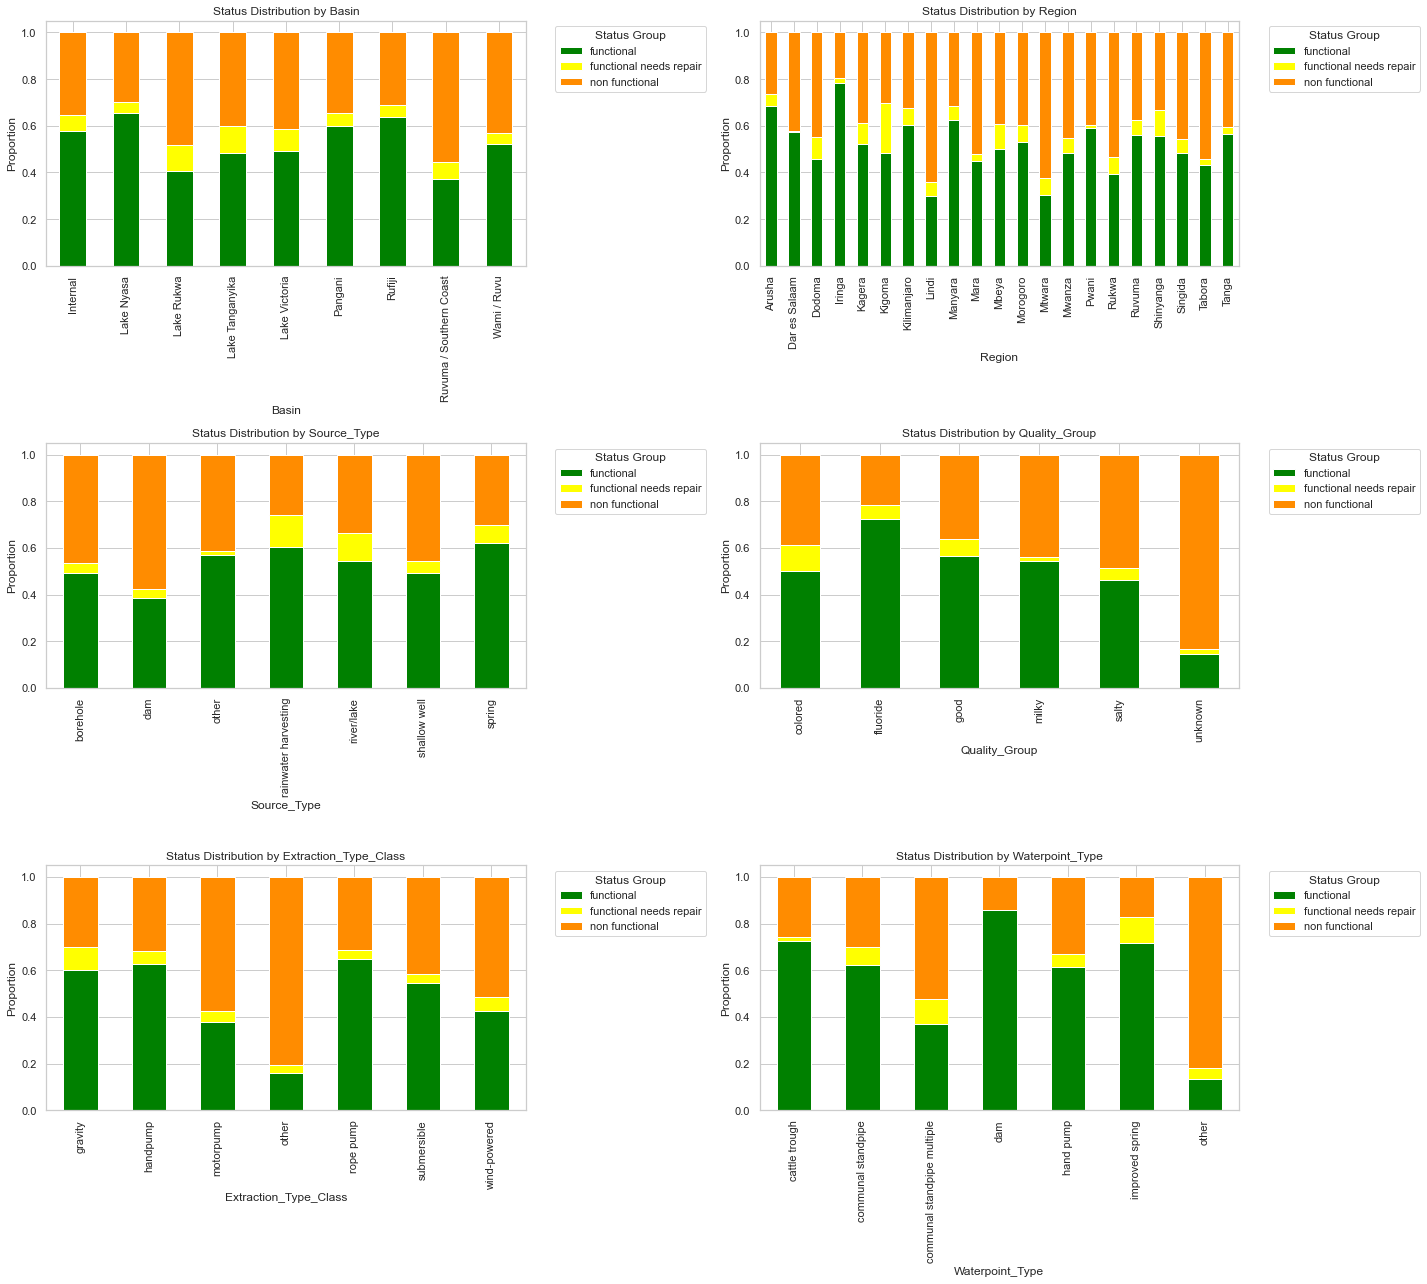

In [26]:
import math

# Adding 'waterpoint_type' to the list of categorical variables
categorical_vars = ['basin', 'region', 'source_type', 'quality_group', 'extraction_type_class', 'waterpoint_type']

# Define custom colors for each status
color_map = {'functional': 'green', 'non functional': 'darkorange', 'functional needs repair': 'yellow'}

# Determine the number of rows needed for the subplot (2 plots per row)
num_vars = len(categorical_vars)
num_rows = math.ceil(num_vars / 2)

# Creating subplots for each categorical variable
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Looping through the variables and creating a stacked bar plot for each
for i, var in enumerate(categorical_vars):
    # Creating a crosstab for the variable and status_group
    crosstab = pd.crosstab(master_data[var], master_data['status_group'], normalize='index')
    
    # Creating a stacked bar plot with custom colors
    crosstab.plot(kind='bar', stacked=True, color=[color_map[status] for status in crosstab.columns], ax=axes[i])
    axes[i].set_title(f'Status Distribution by {var.title()}')
    axes[i].set_xlabel(var.title())
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Status Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()



### Quantity

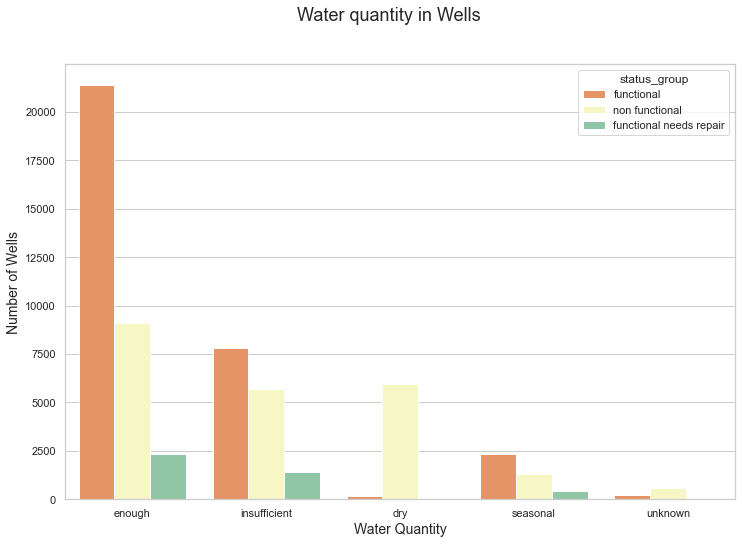

In [27]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='quantity', hue="status_group", palette='Spectral', data=master_data)

# Axis and title
fig.suptitle('Water quantity in Wells', fontsize=18)
plt.xlabel("Water Quantity", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

plt.show();

### Payment_Type

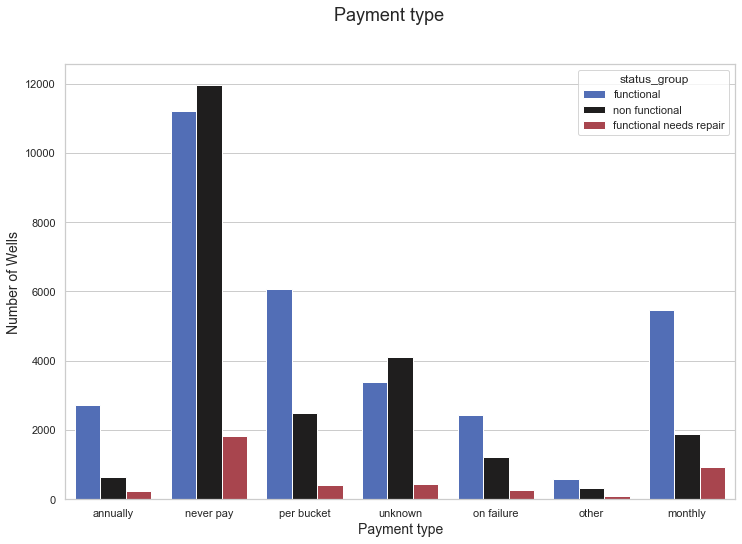

In [28]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue="status_group", palette='icefire', data=master_data)

# Title and axis labels
fig.suptitle('Payment type', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

plt.show();

### Region

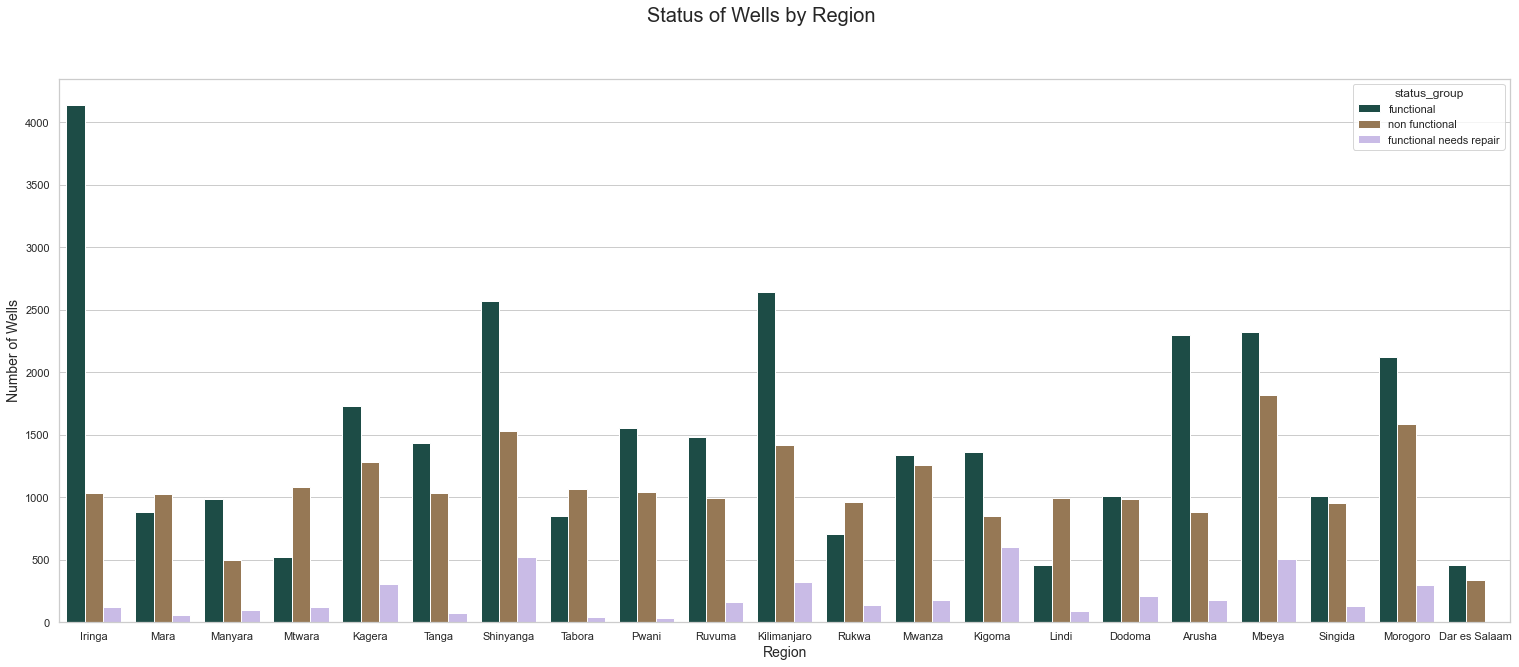

In [35]:
# Plot
fig, ax = plt.subplots(figsize=(26,10))
ax = sns.countplot(x='region', hue="status_group", palette='cubehelix', data=master_data)

# Title and axis labels
fig.suptitle('Status of Wells by Region', fontsize=20)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)

plt.show();

#### Observations

**Basin:** Different basins have varying distributions of well statuses. Some basins may have a higher proportion of functional water points, while others have more non-functional or wells needing repair. This variation could be due to geographical, environmental, or management factors specific to each basin.

**Region:** Similar to basins, each region has a unique distribution of well statuses. Regional variations can be influenced by factors like the level of infrastructure development, maintenance capabilities, and the availability of resources for water point upkeep.

**Source Type:** The type of water source appears to influence the status of wells. Certain source types might be more reliable or easier to maintain, resulting in a higher proportion of functional water points. Conversely, some source types might be prone to issues, leading to more non-functional or repair-needing wells.

**Quality Group:** The quality of water may correlate with the status of the wells. For example, areas with poor water quality might also struggle with maintaining functional water infrastructure.

**Extraction Type Class:** The method used for extracting water is a crucial factor. Some extraction methods might be more robust and less prone to failure, while others could be more complex and require frequent repairs.

**Waterpoint Type:** The method used for the population to access the water from the wells is another crucial factor. Similarly to extraction methods, waterpoint types might be more robust and less prone to failure, while others could be more complex and require frequent repairs.

### Baseline Model #1: Binary Target Column

Class 0 = non-functional/needs repair
<br>
Class 1 = functional

In the context of non-functional wells, focusing on recall (false negative) may be more important to ensure that most of the non-functional wells are correctly identified. We will test two separate baseline models, each with a different binary target column to see which performs best on recall.

In [29]:
# Intitating train_test_split
X = master_data[['waterpoint_type']]
y = master_data['status_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# One Hot Encoding categorical variable
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)

# Plotting Logistic Transform 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_encoded, y_train)

# Checking if the target is balanced
y_test.value_counts(normalize=True)

y_pred = logreg.predict(X_test_encoded)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.35      0.47      8894
           1       0.62      0.90      0.73     10479

    accuracy                           0.65     19373
   macro avg       0.69      0.62      0.60     19373
weighted avg       0.68      0.65      0.61     19373

Confusion Matrix:
 [[3070 5824]
 [1015 9464]]


### Evaluating with ROC Curve

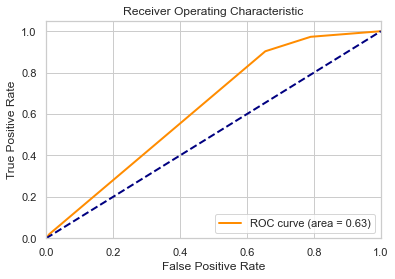

In [30]:
# Predict probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test_encoded)[:, 1]

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Baseline Model #2: Reverse Binary Target Column

Class 0 = non-functional
<br>
Class 1 = functional/needs repair

In [31]:
# Intitating train_test_split
X = master_data[['waterpoint_type']]
y = master_data['status_binary_reversed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# One Hot Encoding categorical variable
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)

# Plotting Logistic Transform 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_encoded, y_train)

# Checking if the target is balanced
y_test.value_counts(normalize=True)

# Predicting and evaluating the model
y_pred = logreg.predict(X_test_encoded)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.37      0.48      7490
           1       0.69      0.89      0.78     11883

    accuracy                           0.69     19373
   macro avg       0.68      0.63      0.63     19373
weighted avg       0.68      0.69      0.66     19373

Confusion Matrix:
 [[ 2758  4732]
 [ 1327 10556]]


### Evaluating with ROC Curve

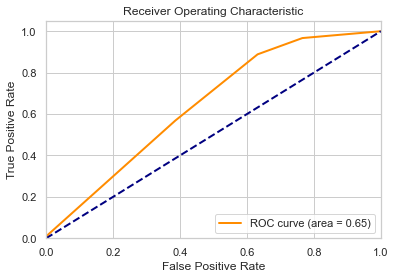

In [32]:
# Predict probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test_encoded)[:, 1]

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Baseline Comparison

#### Baseline 1

**Precision:**

- Class 0: 0.75 (Higher precision for class 0)
- Class 1: 0.62

**Recall:**

- Class 0: 0.35 (Lower recall for class 0)
- Class 1: 0.90 (Higher recall for class 1)

**F1-Score:**

- Class 0: 0.47 (Lower F1-score for class 0)
- Class 1: 0.73

**Accuracy:** 65%

#### Baseline 2

**Precision:**

- Class 0: 0.68 (Lower precision for class 0)
- Class 1: 0.69

**Recall:**

- Class 0: 0.37 (Slightly higher recall for class 0)
- Class 1: 0.89 (Slightly lower recall for class 1)

**F1-Score:**

- Class 0: 0.48 (Slightly higher F1-score for class 0)
- Class 1: 0.78

**Accuracy:** 69% (Higher)

### Analysis

**Baseline 2** shows improved overall performance, with better accuracy and a better balance in precision and recall for both classes. However, it is more prone to falsely identifying class 0 (non-functional) instances as class 1 (functional).

**Baseline 1** while having higher precision for class 0 (non-functional), falls short in accurately identifying class 0 (non-functional) instances (lower recall).

Since we are more concerned with better recall, we will continue our modeling with **Baseline 2**. 

### Random Forest Classifier
This model can provide insights into the importance of various features in predicting well functionality. It's less likely to overfit than individual decision trees and doesn't require feature scaling.

In [33]:
# Preparing the feature set and target variable
X = master_data.drop(['status_binary', 'status_binary_reversed', 'status_group', 'funder', 'scheme_management', 
                      'installer', 'permit', 'date_recorded', 'construction_year', 'well_age'], axis=1)
y = master_data['status_binary_reversed']

# Initializing train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Creating a column transformer with OneHotEncoder for categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Applying the column transformer
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Extracting feature names manually for older versions of scikit-learn
onehot_features = column_transformer.named_transformers_['cat'].get_feature_names(input_features=categorical_cols)
other_features = [col for col in X_train.columns if col not in categorical_cols]
feature_names = np.concatenate([onehot_features, other_features])

# Predicting and evaluating the model
y_pred = rf_model.predict(X_test_encoded)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      6856
           1       0.86      0.90      0.88     10756

    accuracy                           0.85     17612
   macro avg       0.85      0.84      0.84     17612
weighted avg       0.85      0.85      0.85     17612

Confusion Matrix:
 [[5290 1566]
 [1087 9669]]


### Evaluating with ROC Curve

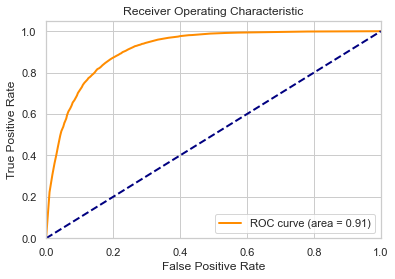

In [34]:
# Predict probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test_encoded)[:, 1]

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Evaluating Feature Importance

In [35]:
# Extracting and displaying feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)
print(top_features)

                               Feature  Importance
84                            latitude    0.153992
83                           longitude    0.152580
62                        quantity_dry    0.101336
82                          gps_height    0.077973
85                          population    0.054906
80               waterpoint_type_other    0.040619
81                          amount_tsh    0.030302
33         extraction_type_class_other    0.030182
63                     quantity_enough    0.028917
87                      month_recorded    0.026894
64               quantity_insufficient    0.015844
51              payment_type_never pay    0.013426
75  waterpoint_type_communal standpipe    0.011889
30       extraction_type_class_gravity    0.010953
44                      management_vwc    0.010815


### Tuning Random Forest Classifier

- SMOTE for oversampling the minority class or adjusting class weights in the model.

- Hyperparameter tuning of the Random Forest model

- RandomizedSearchCV will randomly sample 10 combos of parameters and use 3-fold cross-validation. This will reduce run time compared to GridSearchCV

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

# Handling class imbalance with SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Hyperparameter tuning with Randomized Search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,
    scoring='recall',
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = random_search.best_estimator_

# Re-train and evaluate the model with the best parameters
best_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_model.predict(X_test_encoded)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.62      0.72      6856
           1       0.79      0.93      0.86     10756

    accuracy                           0.81     17612
   macro avg       0.82      0.77      0.79     17612
weighted avg       0.81      0.81      0.80     17612

Confusion Matrix:
 [[ 4244  2612]
 [  755 10001]]


### Evaluating with ROC Curve

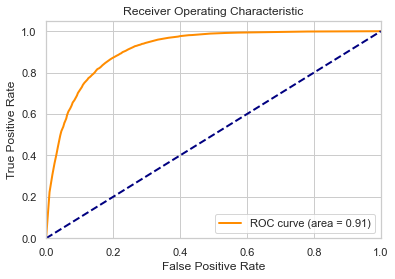

In [37]:
# Predict probabilities for the positive class
y_pred_proba = rf_model.predict_proba(X_test_encoded)[:, 1]

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Comparison Interpretations of Random Forest Models

Class 0 = non-functional/needs repair
<br>
Class 1 = functional

Precision:
- **Original Model:** Precision is 0.83 for both classes.

- **Tuned Model:** Precision increased to 0.85 for class 0 but decreased to 0.79 for class 1.

Recall:
- **Original Model:** Recall is 0.77 for class 0 and 0.90 for class 1.

- **Tuned Model:** Recall decreased to 0.62 for class 0 but increased to 0.93 for class 1.

F1-Score:
- **Original Model:** F1-scores are 0.80 (class 0) and 0.88 (class 1).

- **Tuned Model:** F1-scores are 0.72 (class 0) and 0.86 (class 1).

Accuracy:
- **Original Model:** Overall accuracy is 0.85.

- **Tuned Model:** Overall accuracy decreased to 0.81.

Macro and Weighted Averages:
- **Original Model:** Both macro and weighted averages are around 0.85.

- **Tuned Model:** Both macro and weighted averages are around 0.77 - 0.81.

AUC-ROC Score:
- **Original Model:** The area under the curve is 0.91, which is high. This means the model can effectively distinguish between the positive class (class 1) and the negative class (class 0).

- **Tuned Model:** The area under the curve is also 0.91.

### Analysis of Comparison:
- Tuning the model appears to have made it more biased towards class 1, improving its ability to detect class 1 instances but worsening its performance for class 0 (higher false positives).

- The original model is more balanced in terms of precision and recall across both classes.

- The tuned model has a lower overall accuracy compared to the original model.

### Logistic Regression Model: Most Important Features

In [44]:
# Selecting top 5 most important featues
features = ['region', 'quantity', 'gps_height', 'waterpoint_type', 'extraction_type_class', 'payment_type']
X = master_data[features]
y = master_data['status_binary_reversed']

# Initializing train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = ['quantity', 'region', 'waterpoint_type', 'extraction_type_class', 'payment_type']
numerical_cols = ['gps_height']

# Creating a column transformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Creating a pipeline with preprocessing and logistic regression model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000, random_state=42))
])

# Training the model
model_pipeline.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.54      0.65      6856
           1       0.76      0.93      0.84     10756

    accuracy                           0.78     17612
   macro avg       0.79      0.73      0.74     17612
weighted avg       0.79      0.78      0.76     17612

Confusion Matrix:
 [[3694 3162]
 [ 768 9988]]


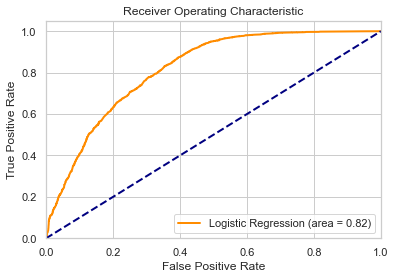

In [42]:
# Calculate probabilities, ROC curve, and AUC for logistic regression
logreg_probs = model_pipeline.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)


# Plotting ROC Curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Interpretation

**Precision:**
- For class 0: 83% precision means that out of all instances predicted as class 0, 83% were actually class 0.

- For class 1: 76% precision indicates that out of all instances predicted as class 1, 76% were actually class 1.

**Recall:**
- For class 0: The recall of 54% is moderate, meaning the model correctly identifies 54% of the actual class 0 instances.

- For class 1: A high recall of 93% indicates the model is very effective at identifying class 1 instances.

**F1-Score:**
- For class 0: The F1-score of 0.65 suggests a balance between precision and recall for class 0, but more weighted towards precision.

- For class 1: The F1-score of 0.84 indicates a strong balance between precision and recall for class 1, favoring recall.

**Accuracy:**
- The overall accuracy of 78% indicates that the model correctly predicts the class for 78% of all instances.

**Macro and Weighted Averages:**
- Macro average treats both classes equally, showing an average precision of 79%, recall of 73%, and F1-score of 74%.

- Weighted average considers class imbalance, showing slightly higher precision and recall, indicating better performance on the more prevalent class 1.

**ROC Score:**
- An ROC score of 0.82 suggests a good ability of the model to distinguish between the two classes. It indicates a favorable balance between the true positive rate and false positive rate across different thresholds.

**Insights:**
- The model performs well overall, especially in predicting class 1, which is indicated by the high recall and F1-score for class 1.

- Model is less effective in correctly identifying class 0 instances, as evidenced by the lower recall for class 0.

- The relatively high number of false positives for class 0 (3162) indicates that the model often misclassifies class 1 instances as class 0.

## Next Steps